# PRACTICA FINAL DEEP LEARNING
# Realizada por **DAYANA FRANCO**

##Objetivo:
Implementar un algoritmo predictivo que sea capaz de estimar el precio de las
habitaciones utilizando para ello datos de distintos tipos

#**1. Descarga y preprocesado de los datos:** #

### **a. Descargar los datos, almacenar las imágenes y eliminar filas del CSV para los cuales no se haya descargado la imagen**


In [12]:
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2023-09-10 03:58:32--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [      <=>           ]  54.31M  2.88MB/s    in 19s     

2023-09-10 03:58:52 (2.92 MB/s) - ‘airbnb-listings.csv’ saved [56950929]



In [13]:
#importar varias bibliotecas en Python para realizar tareas relacionadas con el procesamiento de imágenes y el manejo de datos.
import cv2
import numpy
import pandas
import imageio.v3 as io

from tqdm import tqdm
from typing import Optional, Union

In [14]:
# Cargar datos desde un archivo CSV llamado "airbnb-listings.csv" utilizando la biblioteca pandas.

data = pandas.read_csv("airbnb-listings.csv", sep=';')

# Eliminar filas que contienen valores faltantes (NaN) en la columna 'Price'.

data = data.dropna(subset=['Price'])

# El DataFrame "data" ahora contiene los datos del archivo CSV cargado sin filas que tienen valores faltantes en la columna 'Price'.


In [15]:
# Listado de variables
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

#### Descarga de imágenes

In [16]:
def download_images(paths: list,
                    canvas: tuple = (224, 224),
                    nb_channels: int = 3,
                    max_imgs: Optional[int] = None
                    ) -> tuple:


    # Calcula la cantidad de imágenes a descargar
    n_images = len(paths) if not max_imgs else max_imgs

    # Crea una matriz de ceros para almacenar las imágenes descargadas.
    images = numpy.zeros((n_images, canvas[0], canvas[1], nb_channels), dtype=numpy.uint8)

    # Lista para almacenar los índices de las imágenes descargadas con éxito.
    downloaded_idxs = []

    # Recorre las rutas o URL de las imágenes para descargarlas y ajustarlas al tamaño deseado.
    for i_img, url in enumerate(tqdm(paths, total=n_images)):
        if i_img >= n_images:
            break
        try:
            # Intenta cargar la imagen desde la URL.
            img = io.imread(url)

            # Redimensiona la imagen al tamaño especificado.
            img = cv2.resize(img, (canvas[0], canvas[1]))

            # Agrega el índice de la imagen descargada a la lista de índices exitosos.
            downloaded_idxs.append(i_img)

            # Almacena la imagen redimensionada en la matriz de imágenes.
            images[i_img] = img

        except (IOError, ValueError) as e:
            # Captura excepciones en caso de URL no disponible o error de conversión.
            pass

    # Retorna las imágenes descargadas y los índices de las rutas exitosas.
    return images[downloaded_idxs], downloaded_idxs


#### Normalización y conversión en el rango [0, 1]

In [17]:
# La función download_images se utiliza y se almacenan las imágenes descargadas en 'images' y los índices de las imágenes descargadas en 'idxs'.
images, idxs = download_images(data['Thumbnail Url'], max_imgs=3000)

# Convierte los valores de las imágenes a tipo de dato float32 y normaliza los valores de píxeles en el rango [0, 1].
images = images.astype("float32") / 255.

# Imprime la forma (shape) de la matriz de imágenes resultante.
# Cantidad de imágenes, el ancho, la altura y el número de canales de color de las imágenes.
print(images.shape)


100%|██████████| 3000/3000 [14:28<00:00,  3.45it/s]


(1871, 224, 224, 3)


####Filtrado acorde en los demás datos

In [18]:
# A continuación, se actualiza el DataFrame 'data' para que coincida con las imágenes descargadas.
# Seleccionar las filas correspondientes a los índices 'idxs'.
data = data.iloc[idxs]

# Resetear el índice del DataFrame para crear un nuevo índice numérico continuo.
data = data.reset_index(drop=True)

# Mostrar las primeras 5 filas del DataFrame resultante.
data.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,15459188,https://www.airbnb.com/rooms/15459188,20170407214050,2017-04-08,Paseo De Gracia I (433),"Unique apartment in vibrant neighborhoods, car...","Its high ceilings, wooden floors, large window...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,6.0,10.0,8.0,NaN,NaN,strict,92,0.39,"41.39161588920901,2.1681677061165425","Host Has Profile Pic,Host Identity Verified,Is..."
1,13184463,https://www.airbnb.com/rooms/13184463,20170407214050,2017-04-08,"Rooftop 2 terraces full of art, style and views","Our place is In the cross between Born, Barce...",The views above Barcelona are unique. The styl...,"Our place is In the cross between Born, Barce...",none,NaN,...,10.0,10.0,10.0,NaN,NaN,flexible,1,0.99,"41.38136867557121,2.1808743514708038","Host Has Profile Pic,Host Identity Verified,Is..."
2,17115175,https://www.airbnb.com/rooms/17115175,20170407214050,2017-04-08,Flat close to Plaza España - Eixample,"- Comfortable and clean double bedroom, with a...",NaN,"- Comfortable and clean double bedroom, with a...",none,NaN,...,10.0,10.0,10.0,NaN,NaN,strict,1,0.79,"41.38600531434205,2.1433972223397064","Host Has Profile Pic,Host Identity Verified,Is..."
3,15458789,https://www.airbnb.com/rooms/15458789,20170407214050,2017-04-08,Paseo de Gracia E,"Unique apartment in vibrant neighborhoods, car...","Its high ceilings, wooden floors, large window...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,10.0,10.0,10.0,NaN,NaN,strict,92,0.75,"41.39098987326012,2.1685873390693984","Host Has Profile Pic,Host Identity Verified,Is..."
4,10378650,https://www.airbnb.com/rooms/10378650,20170407214050,2017-04-08,Sagrada famlia's Sunshine apartment,Bright and centric apartment just 50mts away f...,"Lovely & Bright apartment, right next to Sagra...",Bright and centric apartment just 50mts away f...,none,"Located on a nice, clean, quiet and authentic ...",...,10.0,10.0,9.0,NaN,NaN,strict,1,3.63,"41.408073471589645,2.172669055152655","Host Has Profile Pic,Host Identity Verified,Is..."


#### Guardado de los datos para posterior uso/selección

In [19]:
# Guardar la matriz de imágenes 'images' en un archivo binario images_DLDayana de formato NumPy
numpy.save('images_DLDayana.npy', images)

# Guardar el DataFrame 'filtered_data' en un archivo CSV llamado 'filtered_data.csv'.
data.to_csv('data_DLDayana.csv', sep=';', index=False)
!ls -lah images* data*

-rw-r--r-- 1 root root 7.3M Sep 10 04:14 data_DLDayana.csv
-rw-r--r-- 1 root root 1.1G Sep 10 04:14 images_DLDayana.npy


In [20]:
# Importar la biblioteca necesaria para montar Google Drive en Colab.
from google.colab import drive

# Montar Google Drive en Colab y proporcionar acceso a los archivos almacenados en Drive.
# Esto abrirá una ventana emergente para autenticación.
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# Abrir de nuevo
import pandas as pd
import numpy as np

saved_data = pd.read_csv("/content/data_DLDayana.csv", sep=';')
saved_imgs = np.load("/content/images_DLDayana.npy")
saved_data.shape, saved_imgs.shape




((1871, 89), (1871, 224, 224, 3))

#### Etiquetas - Distribución

<Axes: >

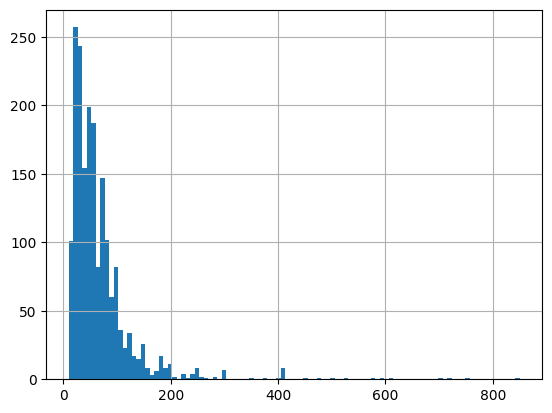

In [22]:
# Generar un histograma de la columna 'Price' del DataFrame 'data'.

data['Price'].hist(bins=100)


Estadísticas descriptivas para la columna 'Price' del DataFrame 'data'.  Esto proporciona información resumida sobre la distribución de los precios en el conjunto de datos.

In [23]:
data['Price'].describe()

count    1871.000000
mean       67.643506
std        67.295800
min        10.000000
25%        30.000000
50%        50.000000
75%        80.000000
max       850.000000
Name: Price, dtype: float64

<Axes: >

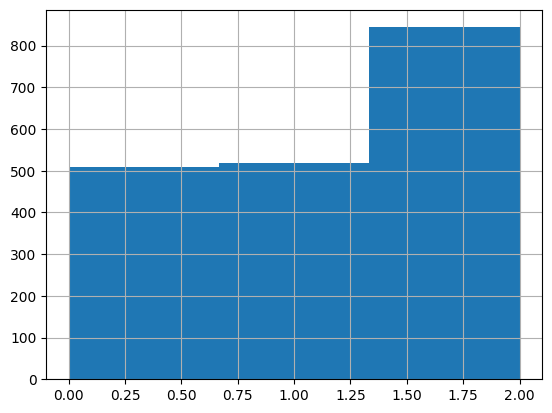

In [24]:
# Crear una lista vacía llamada 'y_class' para almacenar los valores categóricos de los precios.
y_class = []

# Iterar a través de los valores de la columna 'Price' en el DataFrame 'data'.
for y in data['Price']:
    if y <= 32:
        y_class.append(0)  # Rango más barato
    elif 32 < y <= 55:
        y_class.append(1)  # Rango intermedio
    else:
        y_class.append(2)

# Conviertir la lista 'y_class' en una Serie de Pandas.
y_class = pandas.Series(y_class)

# Generar un histograma de los valores categóricos en 'y_class'.
# El argumento 'bins=3' divide en tres intervalos para representar las tres categorías.
y_class.hist(bins=3)


In [25]:
## Reindexamos por sencillez en los pasos siguientes
y_class.index = data.index

In [26]:
ground_truth = data['Price']

<Axes: >

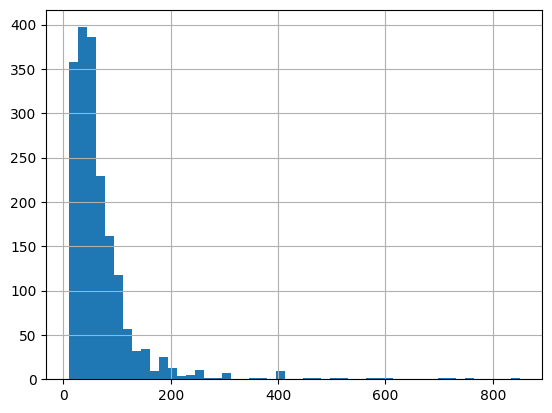

In [27]:
ground_truth.hist(bins=50)

### **b. Split de datos en train/val/test.**





Dado que el objetivo es implementar un algoritmo predictivo para estimar el precio de las habitaciones utilizando datos de distintos tipos,
se logra mejor dividiendo datos en conjuntos de entrenamiento,
validación y prueba para cada tipo de dato, lo que  permite entrenar y evaluar modelos separados para cada uno.

In [28]:
from sklearn.model_selection import train_test_split


# Primero, dividir los datos en conjuntos de entrenamiento, validación y prueba.
train_df, test_df, train_y, test_y = train_test_split(data, y_class,
                                                      test_size=0.25,
                                                      random_state=42,
                                                      shuffle=True,
                                                      stratify=y_class)
train_df, val_df, train_y, val_y = train_test_split(train_df, train_y,
                                                    test_size=0.15,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=train_y)


In [29]:
# Almacenar los índices correspondientes a las particiones
train_idx, val_idx, test_idx = train_df.index, val_df.index, test_df.index
# De ese modo podemos tener a mano cualquier muestra en cualquier partición. Por ejemplo...OJO CORREGIR PORQUE ESTA IGUAL AL PROFESOR
print(data.loc[train_idx].shape)
print(y_class.loc[train_idx].shape)

(1192, 89)
(1192,)


In [30]:
#Asegúrarse de que los índices en data y y_class sean únicos y estén en el mismo orden.
data.reset_index(drop=True, inplace=True)
y_class.reset_index(drop=True, inplace=True)


In [31]:
#Verificar que los índices coincidan:
print(data.index.equals(y_class.index))


True


### **c. Normalización y redimensionado de datos numéricos y categóricos**

In [32]:
import pandas as pd

variables_seleccionadas = ['Property Type', 'Room Type', 'Cancellation Policy', 'Accommodates',
                          'Bathrooms', 'Bedrooms', 'Beds', 'Guests Included', 'Extra People',
                          'Minimum Nights', 'Maximum Nights', 'Number of Reviews',
                          'Host Total Listings Count']


data_info = pd.DataFrame(data[variables_seleccionadas].dtypes, columns=['Tipo de Dato'])
data_info['Columna'] = data_info.index

# Aumentar el número máximo de filas que se mostrarán en la salida.
pd.set_option('display.max_rows', None)

# Mostrar todas las columnas del DataFrame
print(data_info)




                          Tipo de Dato                    Columna
Property Type                   object              Property Type
Room Type                       object                  Room Type
Cancellation Policy             object        Cancellation Policy
Accommodates                     int64               Accommodates
Bathrooms                      float64                  Bathrooms
Bedrooms                       float64                   Bedrooms
Beds                           float64                       Beds
Guests Included                  int64            Guests Included
Extra People                     int64               Extra People
Minimum Nights                   int64             Minimum Nights
Maximum Nights                   int64             Maximum Nights
Number of Reviews                int64          Number of Reviews
Host Total Listings Count      float64  Host Total Listings Count


- Nota 1:
1. Seleccionar variables de interés de entre:
'Property Type', 'Room Type', 'Cancellation Policy', 'Accommodates', 'Bathrooms', 'Bedrooms',
'Beds','Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Number of
Reviews', 'Host Total Listings Count'

<ipython-input-33-74a5384be4b6>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_selected.corr()


Beds                       Accommodates                 0.834752
Accommodates               Beds                         0.834752
Beds                       Bedrooms                     0.714912
Bedrooms                   Beds                         0.714912
                           Accommodates                 0.704561
Accommodates               Bedrooms                     0.704561
                           Guests Included              0.513005
Guests Included            Accommodates                 0.513005
Bathrooms                  Bedrooms                     0.423331
Bedrooms                   Bathrooms                    0.423331
Beds                       Bathrooms                    0.423159
Bathrooms                  Beds                         0.423159
Guests Included            Extra People                 0.417940
Extra People               Guests Included              0.417940
Guests Included            Beds                         0.386383
Beds                     

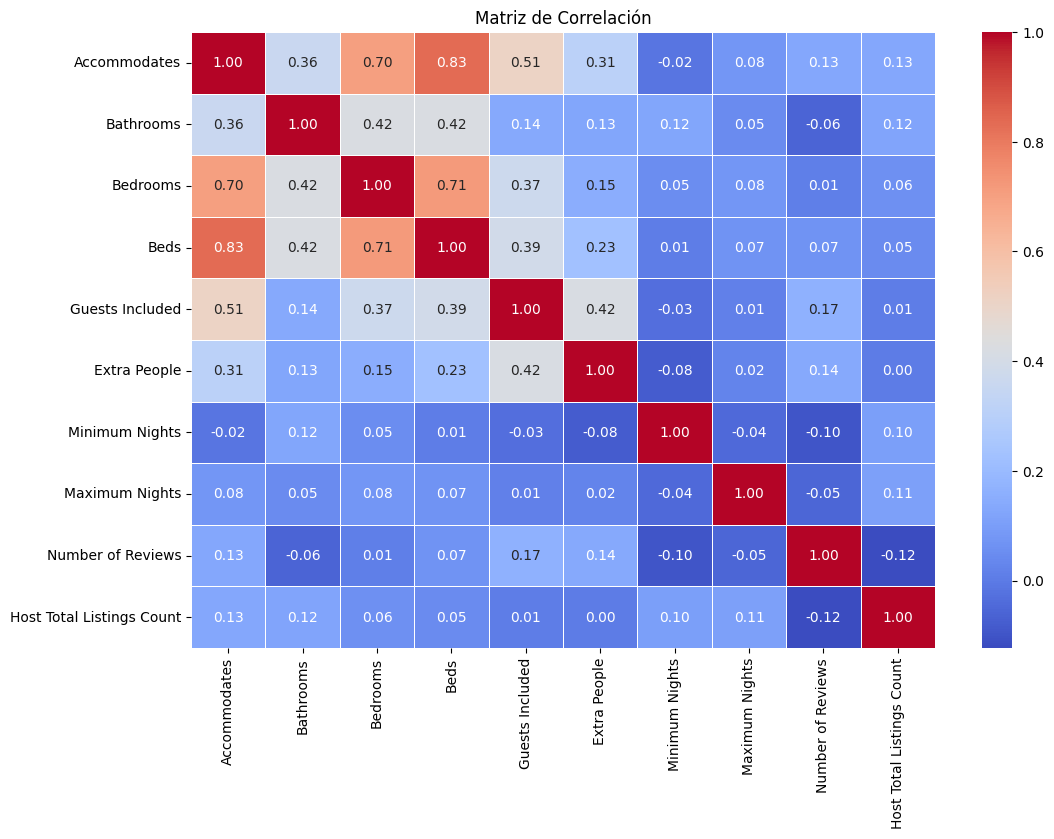

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Crear un nuevo DataFrame con las variables seleccionadas.
data_selected = data[variables_seleccionadas]

# Calcular la matriz de correlación.
correlation_matrix = data_selected.corr()

# Ordenar las correlaciones de mayor a menor.
correlation_ranking = correlation_matrix.unstack().sort_values(ascending=False)

# Filtrar las correlaciones duplicadas y mostrarlas.
correlation_ranking = correlation_ranking[correlation_ranking != 1.0]  # Eliminar correlaciones perfectas con sí mismas
print(correlation_ranking)

# Crear un mapa de calor de la matriz de correlación.
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


Veo que Accomodates esta muy relacionada con Bedrooms y Beds, por lo que no la escojo.  
Creo que maximun  y minimun nights no son representativas para la tarea de estimar el precio de las habitaciones--> no las escojo.

In [34]:
# Crear un nuevo DataFrame con las columnas numéricas seleccionadas
columnas_numericas_seleccionadas = ['Bathrooms', 'Beds', 'Number of Reviews', 'Host Total Listings Count']
data[columnas_numericas_seleccionadas].shape

(1871, 4)

In [35]:
#Realización de "escalamiento estándar" (StandardScaler) en columnas numéricas de tres conjuntos de datos diferentes: train_df, val_df, y test_df.

from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Transformar las columnas numéricas en train_df
train_num = pd.DataFrame(scaler.fit_transform(train_df[columnas_numericas_seleccionadas]),
                         columns=columnas_numericas_seleccionadas)

# Transformar las columnas numéricas en val_df
val_num = pd.DataFrame(scaler.transform(val_df[columnas_numericas_seleccionadas]),
                       columns=columnas_numericas_seleccionadas)

# Transformar las columnas numéricas en test_df
test_num = pd.DataFrame(scaler.transform(test_df[columnas_numericas_seleccionadas]),
                        columns=columnas_numericas_seleccionadas)

# Concatenar los DataFrames en un único DataFrame
numerical_data = pd.concat([train_num, val_num, test_num], axis=0)

# Restaurar los índices para que coincidan con data
numerical_data.index = data.index

# Verificar la forma del DataFrame resultante
print("Dimensiones del conjunto de datos numéricos:", numerical_data.shape)


Dimensiones del conjunto de datos numéricos: (1871, 4)


####Columnas tipo objeto:

In [36]:
Columnas_Objeto = ['Property Type', 'Room Type', 'Cancellation Policy']
data[Columnas_Objeto].head()



,Property Type,Room Type,Cancellation Policy
0,Apartment,Entire home/apt,strict
1,Apartment,Entire home/apt,flexible
2,Apartment,Private room,strict
3,Apartment,Entire home/apt,strict
4,Apartment,Entire home/apt,strict


In [37]:
# Lista de columnas categóricas seleccionadas
Columnas_Objeto = ['Property Type', 'Room Type', 'Cancellation Policy']

# Convertir las columnas categóricas en variables one-hot
# PropertyType
property_type = pd.get_dummies(data[['Property Type']], prefix='Property_Type')

# Room Type
room_type = pd.get_dummies(data[['Room Type']], prefix='Room Type')

# Cancellation Policy
canc_pol = pd.get_dummies(data['Cancellation Policy'], prefix='Cancellation_Policy')

# Juntamos los datos categóricos
categorical_data = pd.concat([property_type, room_type, canc_pol], axis=1, join='inner')

# Verificar las dimensiones del DataFrame resultante
print("Dimensiones del conjunto de datos categóricos one-hot:", categorical_data.shape)


Dimensiones del conjunto de datos categóricos one-hot: (1871, 19)


####Concatenar columnas Numericas y Categoricas

In [38]:
data = pandas.concat([numerical_data, categorical_data], axis=1)
data.head()


,Bathrooms,Beds,Number of Reviews,Host Total Listings Count,Property_Type_Apartment,Property_Type_Bed & Breakfast,Property_Type_Casa particular,Property_Type_Chalet,Property_Type_Condominium,Property_Type_Dorm,...,Property_Type_Loft,Property_Type_Other,Property_Type_Townhouse,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Cancellation_Policy_flexible,Cancellation_Policy_moderate,Cancellation_Policy_strict,Cancellation_Policy_super_strict_60
0,1.105241,3.742685,0.331701,-0.280272,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,-0.399256,-0.012666,-0.601570,-0.310759,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.399256,1.239118,1.142173,-0.310759,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,-0.399256,-0.012666,-0.478771,0.451420,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,-0.399256,-0.638557,2.345601,-0.280272,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


####Valores NAN:

In [39]:
nan_counts = data.isna().sum()
nan_columns = nan_counts[nan_counts > 0]
print(nan_columns)


Bathrooms                    8
Beds                         9
Host Total Listings Count    1
dtype: int64


####Completo los NAN con la media :

In [40]:
# Columnas numéricas con valores faltantes
columnas_con_nan = ['Bathrooms', 'Beds','Host Total Listings Count']

# Rellenar los valores faltantes con la media de cada columna
for col in columnas_con_nan:
    data[col] = data[col].fillna(data[col].mean())


In [41]:
# Mirar los NAN despues del reemplazo:
data.isna().sum()

Bathrooms                              0
Beds                                   0
Number of Reviews                      0
Host Total Listings Count              0
Property_Type_Apartment                0
Property_Type_Bed & Breakfast          0
Property_Type_Casa particular          0
Property_Type_Chalet                   0
Property_Type_Condominium              0
Property_Type_Dorm                     0
Property_Type_Guesthouse               0
Property_Type_Hostel                   0
Property_Type_House                    0
Property_Type_Loft                     0
Property_Type_Other                    0
Property_Type_Townhouse                0
Room Type_Entire home/apt              0
Room Type_Private room                 0
Room Type_Shared room                  0
Cancellation_Policy_flexible           0
Cancellation_Policy_moderate           0
Cancellation_Policy_strict             0
Cancellation_Policy_super_strict_60    0
dtype: int64

### **d. Normalización y redimensionado de imágenes**

####Clasificación basada en datos tabulares (FC layers)

Normalizar entre 0 y 1

In [42]:
#Detectar valores máximos

data.max(axis=0)

Bathrooms                              10.132219
Beds                                    8.749819
Number of Reviews                       7.822426
Host Total Listings Count               5.969601
Property_Type_Apartment                 1.000000
Property_Type_Bed & Breakfast           1.000000
Property_Type_Casa particular           1.000000
Property_Type_Chalet                    1.000000
Property_Type_Condominium               1.000000
Property_Type_Dorm                      1.000000
Property_Type_Guesthouse                1.000000
Property_Type_Hostel                    1.000000
Property_Type_House                     1.000000
Property_Type_Loft                      1.000000
Property_Type_Other                     1.000000
Property_Type_Townhouse                 1.000000
Room Type_Entire home/apt               1.000000
Room Type_Private room                  1.000000
Room Type_Shared room                   1.000000
Cancellation_Policy_flexible            1.000000
Cancellation_Policy_

Utilizar el escalador MinMaxScaler para realizar una transformación llamada "normalización min-max" en tres conjuntos de datos diferentes: train_X, val_X, y test_X

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Crear una instancia del escalador MinMaxScaler
Normalizar_scaler = MinMaxScaler()

# Obtener las columnas del DataFrame 'data'
cols = data.columns

# Aplicar el ajuste del escalador a los datos de entrenamiento y transformarlos
train_X = pandas.DataFrame(Normalizar_scaler.fit_transform(data.loc[train_idx]),
                           columns=cols)

# Transformar los datos de validación utilizando el ajuste realizado en los datos de entrenamiento
val_X = pandas.DataFrame(Normalizar_scaler.transform(data.loc[val_idx]),
                         columns=cols)

# Transformar los datos de prueba utilizando el ajuste realizado en los datos de entrenamiento
test_X = pandas.DataFrame(Normalizar_scaler.transform(data.loc[test_idx]),
                          columns=cols)



In [44]:
train_X.max(axis=0)

Bathrooms                              1.0
Beds                                   1.0
Number of Reviews                      1.0
Host Total Listings Count              1.0
Property_Type_Apartment                1.0
Property_Type_Bed & Breakfast          1.0
Property_Type_Casa particular          0.0
Property_Type_Chalet                   1.0
Property_Type_Condominium              1.0
Property_Type_Dorm                     1.0
Property_Type_Guesthouse               1.0
Property_Type_Hostel                   0.0
Property_Type_House                    1.0
Property_Type_Loft                     1.0
Property_Type_Other                    1.0
Property_Type_Townhouse                1.0
Room Type_Entire home/apt              1.0
Room Type_Private room                 1.0
Room Type_Shared room                  1.0
Cancellation_Policy_flexible           1.0
Cancellation_Policy_moderate           1.0
Cancellation_Policy_strict             1.0
Cancellation_Policy_super_strict_60    1.0
dtype: floa

### **e. Empleo de exactamente el mismo split train/val/test que para los datos tabulares anteriores**


####Clasificacion - Datos Tabulares

In [45]:
from tensorflow.keras.utils import to_categorical

# Convertir las etiquetas de clasificación a one-hot encoding
train_y_cls = to_categorical(y_class.loc[train_idx])
val_y_cls = to_categorical(y_class.loc[val_idx])
test_y_cls = to_categorical(y_class.loc[test_idx])

# Verificar las dimensiones de los conjuntos de etiquetas one-hot
print("Dimensiones del conjunto de entrenamiento:", train_y_cls.shape)
print("Dimensiones del conjunto de validación:", val_y_cls.shape)
print("Dimensiones del conjunto de prueba:", test_y_cls.shape)

Dimensiones del conjunto de entrenamiento: (1192, 3)
Dimensiones del conjunto de validación: (211, 3)
Dimensiones del conjunto de prueba: (468, 3)


##**2. Modelado**

### **a. Para los datos tabulares, preferiblemente desarrollar de cero una red neuronal de capas Dense.**


####Clasificador de imágenes:

In [46]:
# Importar las clases necesarias de Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Imprimir el tamaño de entrada de la red neuronal
print(f"Input size: {data.shape[1]}")

# Calcular el número de clases de salida
nb_out = train_y_cls.shape[1]

# Crear un modelo de red neuronal secuencial
classifier1D = Sequential()

# Agregar una capa densa inicial con 64 neuronas y función de activación ReLU
# La capa de entrada tiene un tamaño igual al número de características en 'data'
classifier1D.add(Dense(64, input_shape=(data.shape[1],), activation='relu'))

# Agregar una segunda capa densa con 32 neuronas y función de activación ReLU
classifier1D.add(Dense(32, activation='relu'))

# Agregar una tercera capa densa con 8 neuronas y función de activación ReLU
classifier1D.add(Dense(8, activation='relu'))

# Agregar una capa de salida con 'nb_out' neuronas y función de activación softmax
# 'nb_out' es el número de clases de salida
classifier1D.add(Dense(nb_out, activation='softmax'))

# Compilar el modelo especificando la función de pérdida, el optimizador y las métricas
classifier1D.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Mostrar un resumen del modelo, que proporciona información sobre las capas y los parámetros
classifier1D.summary()


Input size: 23
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                1536      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 8)                 264       
                                                                 
 dense_8 (Dense)             (None, 3)                 27        
                                                                 
Total params: 3907 (15.26 KB)
Trainable params: 3907 (15.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Entrenar el modelo de red neuronal classifier1D utilizando los datos de entrenamiento (train_X y train_y_cls) mediante el método fit:

In [47]:
# Entrenar un número fijo de épocas
EPOCHS = 20
BS = 32

H = classifier1D.fit(x=train_X, y=train_y_cls, batch_size=BS, epochs=EPOCHS,
          validation_data=(val_X, val_y_cls), shuffle=True, verbose=1)

Epoch 1/20
38/38 [==============================] - 1s 11ms/step - loss: 1.0173 - accuracy: 0.4396 - val_loss: 0.9232 - val_accuracy: 0.4550
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.8981 - accuracy: 0.4815 - val_loss: 0.8267 - val_accuracy: 0.6967
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.8311 - accuracy: 0.6619 - val_loss: 0.7524 - val_accuracy: 0.7062
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.7788 - accuracy: 0.6711 - val_loss: 0.7029 - val_accuracy: 0.7014
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.7531 - accuracy: 0.6737 - val_loss: 0.6932 - val_accuracy: 0.6967
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.7479 - accuracy: 0.6728 - val_loss: 0.6917 - val_accuracy: 0.7014
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.7427 - accuracy: 0.6728 - val_loss: 0.7122 - val_accuracy: 0.6967
Epoch 8/20
38/38 [=

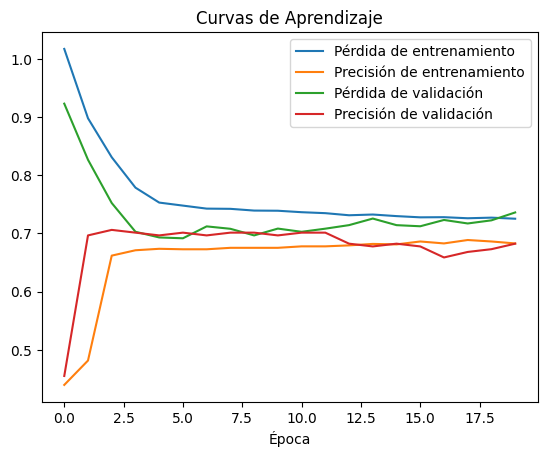

In [48]:
# Curvas de aprendizaje
plt.plot(H.history['loss'], label='Pérdida de entrenamiento')
plt.plot(H.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(H.history['val_loss'], label='Pérdida de validación')
plt.plot(H.history['val_accuracy'], label='Precisión de validación')
plt.legend()  # Leyendas al gráfico para identificar las curvas
plt.xlabel('Época')  # Etiqueta del eje x
plt.title('Curvas de Aprendizaje')  # Título del gráfico
plt.show()


Conclusiones:
A lo largo de las 20 épocas de entrenamiento, tanto la pérdida de entrenamiento como la precisión de entrenamiento se mantienen relativamente estables, con pequeñas fluctuaciones. La pérdida de entrenamiento disminuye gradualmente, lo que indica que el modelo está aprendiendo y ajustándose a los datos de entrenamiento.

Validación:  La pérdida de validación muestra una tendencia ligeramente creciente a lo largo de las épocas, aunque también con fluctuaciones. Esto podría indicar que el modelo está comenzando a sobreajustarse a los datos de entrenamiento, ya que no generaliza tan bien en los datos de validación. La precisión de validación muestra una variabilidad en el rango del 64% - 67%, lo que indica que el modelo no se desempeña de manera consistente en los datos de validación.

Entrenamiento:  La precisión de entrenamiento se mantiene en un nivel constante alrededor del 69% - 70%, lo que sugiere que el modelo está teniendo dificultades para mejorar más allá de ese punto en los datos de entrenamiento.

In [49]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = classifier1D.evaluate(test_X, test_y_cls)

# Imprimir la pérdida y la precisión del modelo en el conjunto de prueba
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')


15/15 [==============================] - 0s 2ms/step - loss: 0.7673 - accuracy: 0.6624
Pérdida en el conjunto de prueba: 0.7673231959342957
Precisión en el conjunto de prueba: 0.6623931527137756


el modelo tiene una pérdida de aproximadamente 0.7695 y una precisión de aproximadamente 67.16% en el conjunto de prueba. Esto significa que el modelo es capaz de predecir correctamente la categoría de los datos de prueba con una precisión del 67.16%, lo que sugiere un rendimiento razonable en este conjunto de datos.

#PRUEBAS ADICIONALES - NOTA
A pesar de muchas horas de trabajo y codigos, no se logro el resultado... no cuento con mas tiempo para seguir buscando la solucion.

In [50]:
# Importar las bibliotecas necesarias
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
import tensorflow as tf

In [66]:
print("Dimensiones de train_X:", train_X.shape)
print("Dimensiones de val_X:", val_X.shape)


Dimensiones de train_X: (1192, 23)
Dimensiones de val_X: (211, 23)


In [65]:
import tensorflow as tf

# Redimensionar las imágenes de entrenamiento a (32, 32, 3)
train_X_resized = tf.image.resize(train_X, (32, 32, 32, 3))

# Redimensionar las imágenes de validación a (32, 32, 3)
val_X_resized = tf.image.resize(val_X, (val_X.shape[0], 32, 32, 3))

# Ahora train_X_resized y val_X_resized tienen la forma correcta (32x32x3)


ValueError: ignored

In [51]:
# Inicializar el modelo secuencial
model = Sequential()

# Probabilidad de dropout (probabilidad de que un peso w = 0 durante el entrenamiento)
P = 0.25

# Definir una capa convolucional con la forma de entrada
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(P))

# Definir una segunda capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(P))

# Definir una tercera capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(P))


In [52]:
# Añadir el clasificador
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(P))
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=100,
    decay_rate=0.96,
    staircase=True
)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=lr_schedule),
              metrics=['accuracy'])


In [55]:
import tensorflow as tf

# Redimensionar las imágenes de entrenamiento a la forma deseada (32x32x3)
train_X_resized = tf.image.resize(train_X, (32,32, 32))

# Entrenar el modelo
model.fit(train_X, to_categorical(train_y_cls),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(val_X, to_categorical(val_y_cls)))


ValueError: ignored

In [ ]:
# Evaluar el modelo
scores = model.evaluate(test_X, to_categorical(test_y_cls))

print('Pérdida: %.3f' % scores[0])
print('Precisión: %.3f' % scores[1])


Prueba con regularización elástica

In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Inicializar el modelo
model = Sequential()

# Agregar capas ocultas con regularización elástica
model.add(Dense(128, activation='relu', input_shape=(23,), kernel_regularizer=l1_l2(0.01, 0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(0.01, 0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(0.01, 0.01)))

# Añadir capa de salida
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=100,
    decay_rate=0.96,
    staircase=True
)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=lr_schedule),
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_X, to_categorical(train_y_cls),
          batch_size=128,
          shuffle=True,
          epochs=5,
          validation_data=(val_X, to_categorical(val_y_cls)))

# Evaluar el modelo
scores = model.evaluate(test_X, to_categorical(test_y_cls))

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])


Epoch 1/5


ValueError: ignored

####Regresión con datos tabulares (FC layers)

In [41]:
# Normalizar min-max a las etiquetas del problema de regresión, lo que significa
#que escala los valores de las etiquetas para que estén dentro del rango [0, 1].
mm_scaler = MinMaxScaler()

train_y_reg = mm_scaler.fit_transform(
    ground_truth.loc[train_idx].values.reshape(-1, 1))
val_y_reg = mm_scaler.transform(
    ground_truth.loc[val_idx].values.reshape(-1, 1))
test_y_reg = mm_scaler.transform(
    ground_truth.loc[test_idx].values.reshape(-1, 1))

train_y_reg.shape, val_y_reg.shape, test_y_reg.shape


((1192, 1), (211, 1), (468, 1))

Crea un modelo de regresión con capas densas (Dense) en Keras. El modelo se utiliza para predecir valores numéricos en lugar de realizar clasificación. Se utiliza la función de activación lineal en la capa de salida porque estamos realizando regresión. El modelo se compila utilizando la pérdida de error cuadrático medio (MSE) como función de pérdida y el optimizador Adam.

###**b. Arquitectura Neuronal elegida**

In [42]:
# Crear un modelo para hacer primero clasificación con y_class
print(f"Input size: {data.shape[1]}")  # Imprimir el tamaño de la entrada (número de características)

# Determinar el número de salidas para el modelo
nb_out = train_y_reg.shape[1]

# Crear un modelo secuencial
regressor1D = Sequential()

# Agregar una capa densa con 64 unidades de neuronas, función de activación ReLU y especificar la forma de entrada
regressor1D.add(Dense(64, input_shape=(data.shape[1],), activation='relu'))

# Agregar una capa densa con 32 unidades de neuronas y función de activación ReLU
regressor1D.add(Dense(32, activation='relu'))

# Agregar una capa densa con 8 unidades de neuronas y función de activación ReLU
regressor1D.add(Dense(8, activation='relu'))

# Agregar la capa de salida con el número de salidas determinado y función de activación lineal (regresión)
regressor1D.add(Dense(nb_out, activation='linear'))  # Sin función de activación

# Compilar el modelo usando la pérdida de error cuadrático medio (mean squared error) y el optimizador Adam
regressor1D.compile(loss='mean_squared_error', optimizer='adam')

# Mostrar un resumen del modelo
regressor1D.summary()



Input size: 23
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                1536      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 8)                 264       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3889 (15.19 KB)
Trainable params: 3889 (15.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


####Entrenar un modelo de red neuronal para datos tabulares durante un número fijo de épocas:

In [43]:
# Entrenamos un número fijo de épocas
EPOCHS = 20
BS = 32

H = regressor1D.fit(x=train_X, y=train_y_reg, batch_size=BS, epochs=EPOCHS,
          validation_data=(val_X, val_y_reg), shuffle=True, verbose=1)

Epoch 1/20
38/38 [==============================] - 2s 15ms/step - loss: 0.0108 - val_loss: 0.0041
Epoch 2/20
38/38 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.0032
Epoch 3/20
38/38 [==============================] - 0s 4ms/step - loss: 0.0070 - val_loss: 0.0032
Epoch 4/20
38/38 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.0031
Epoch 5/20
38/38 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.0026
Epoch 6/20
38/38 [==============================] - 0s 4ms/step - loss: 0.0063 - val_loss: 0.0023
Epoch 7/20
38/38 [==============================] - 0s 4ms/step - loss: 0.0062 - val_loss: 0.0021
Epoch 8/20
38/38 [==============================] - 0s 4ms/step - loss: 0.0060 - val_loss: 0.0022
Epoch 9/20
38/38 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.0021
Epoch 10/20
38/38 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0022
Epoch 11/20
38/38 

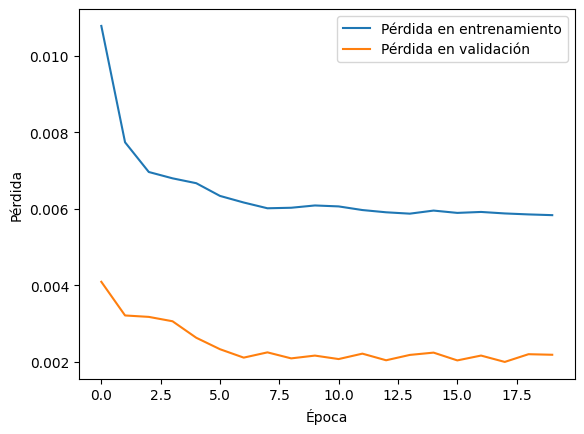

In [44]:
# Comprobar las curvas de aprendizaje
plt.plot(H.history['loss'], label='Pérdida en entrenamiento')  # Establecer la pérdida en el conjunto de entrenamiento
plt.plot(H.history['val_loss'], label='Pérdida en validación')  # Establecer la pérdida en el conjunto de validación
plt.legend()  # Agregar una etiqueta al gráfico para identificar las curvas
plt.xlabel('Época')  # Etiquetar el eje x
plt.ylabel('Pérdida')  # Etiquetar el eje y
plt.show()  # Mostrar el gráfico


Notas:  las perdidas despues de la epoca 5 descienden lentamente, se ven despues de esa epoca un poco estable.

##**c. Elección para cada modelo de una función de pérdidas acorde**

Realizar una evaluación del modelo de regresión (regressor1D) en un conjunto de prueba y calcula dos métricas: la pérdida cuadrática media (MSE, Mean Squared Error) y el coeficiente de correlación de rango de Spearman (Spearman Rank Correlation Coefficient). Los valores del coeficiente de correlación de rango de Spearman por debajo de 0.5 se consideran correlaciones débiles. Esto significa que si el valor de rho es cercano a 0.5 o menos, la correlación entre las etiquetas reales y las predicciones se considera débil, y si es cercano a 1 o -1, la correlación es más fuerte.

In [45]:
from scipy.stats import spearmanr  # Importar la función de correlación de rango de Spearman

# Evaluar el modelo en el conjunto de prueba y calcular la pérdida (MSE)
loss = regressor1D.evaluate(test_X, test_y_reg)  # Calcular la pérdida (MSE) en el conjunto de prueba

# Calcular el coeficiente de correlación de rango de Spearman entre las etiquetas reales y las predicciones
rho = spearmanr(test_y_reg, regressor1D.predict(test_X))[0]  # Calcular el coeficiente de correlación de rango de Spearman

# Imprimir la pérdida (MSE) y el coeficiente de correlación de rango de Spearman
print(f'Pérdida (MSE)={loss:.3f}, Coeficiente de Correlación de Rango de Spearman={rho:.3f}')

# Nota: Spearman es un ratio de correlación empleado para ver la relación entre el orden de dos listas de números.
# Valores de esta métrica por debajo de 0.5 se consideran correlaciones débiles.


15/15 [==============================] - 0s 1ms/step
Pérdida (MSE)=0.006, Coeficiente de Correlación de Rango de Spearman=0.607


Primero evaluar  el modelo de regresión en el conjunto de prueba y calculamos la pérdida utilizando el error cuadrático medio (MSE). Luego, se calcula el coeficiente de correlación de rango de Spearman entre las etiquetas reales y las predicciones del modelo. El coeficiente de Spearman se utiliza para medir la relación de orden entre dos conjuntos de datos y es especialmente útil cuando las relaciones no son lineales. Un valor por encima de 0.5 se considera una correlación fuerte, como en éste caso.

Los resultados indican que el modelo ha logrado una baja pérdida (MSE) en la predicción de los precios y un coeficiente de correlación de rango de Spearman mayor a 0.5.

En resumen, el modelo parece ser prometedor en términos de predicción de precios.

####Representar gráficamente la comparación entre los precios reales desescalados y las predicciones del modelo en un histograma.

15/15 [==============================] - 0s 1ms/step


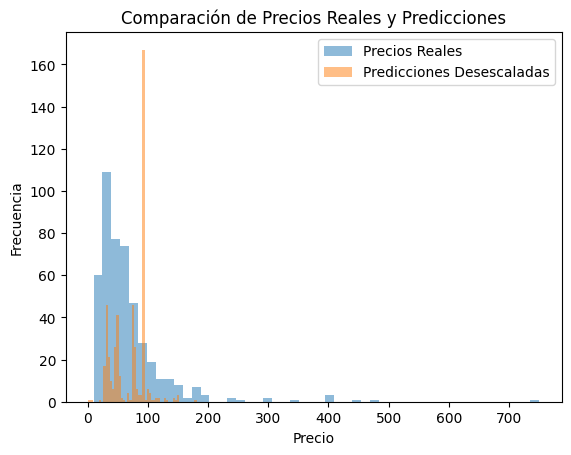

In [46]:

import matplotlib.pyplot as plt

# Representar los precios reales desescalados frente a la predicción
test_prices = ground_truth.loc[test_idx]
raw_preds = regressor1D.predict(test_X)
rescaled_preds = mm_scaler.inverse_transform(raw_preds)


# Crear un histograma de precios reales y predicciones desescaladas
plt.hist(test_prices, bins=50, alpha=0.5, label='Precios Reales')
plt.hist(rescaled_preds, bins=50, alpha=0.5, label='Predicciones Desescaladas')

# Agregar etiquetas para los ejes x e y y un título al gráfico
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Comparación de Precios Reales y Predicciones')

# Agregar una leyenda explicativa
plt.legend()

# Mostrar el gráfico
plt.show()


####Clasificación con imágenes (CNN)


Preparar un modelo pre-entrenado VGG19

In [47]:
from tensorflow.keras.applications import ResNet50

# Obtener el tamaño de entrada de las imágenes a partir de la forma de la primera imagen en el conjunto de datos
input_shape = images[0].shape  # Tamaño de la imagen de entrada

# Cargar el modelo ResNet50 preentrenado en ImageNet y excluir la capa superior
base_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
# Carga del modelo base ResNet50 preentrenado con pesos de ImageNet y define la forma de entrada

# Mostrar un resumen del modelo base ResNet50
base_resnet.summary()  # Imprime un resumen de la arquitectura y los parámetros del modelo base ResNet50





Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

El modelo tiene un gran número de parámetros en total, pero la mayoría de ellos son entrenables, lo que significa que se pueden ajustar mediante el entrenamiento en los datos específicos de la tarea de clasificación. Solo una pequeña cantidad de parámetros son no entrenables, que provienen del modelo base ResNet-50 preentrenado y se mantuvieron fijos. Este desglose es importante para comprender la complejidad del modelo y cuántos parámetros se ajustarán durante el entrenamiento. También es útil para estimar los requisitos de memoria y recursos computacionales necesarios para entrenar y usar el modelo.

### **d. Transfer-learning -  Empleo de exactamente el mismo split train/val/test que para los datos tabulares anteriores**

####Configuración y construcción de un nuevo modelo de clasificación basado en la arquitectura ResNet-50 preentrenada en ImageNet.

In [48]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
# Establecer todas las capas del modelo base ResNet50 como no entrenables
for layer in base_resnet.layers:
    layer.trainable = False  # Establecer cada capa como no entrenable para evitar que sus pesos se actualicen durante el entrenamiento

DROPOUT = 0.5  # Definir la tasa de dropout para regularización
nb_out = train_y_cls.shape[1]  # Obtener el número de clases de salida

last = base_resnet.layers[-1].output  # Obtener la salida de la última capa del modelo base
x = GlobalAveragePooling2D()(last)  # Agregar una capa de Global Average Pooling para reducir la dimensionalidad
x = Dense(256, activation='relu', name='fc1')(x)  # Agregar una capa densa completamente conectada con activación ReLU
x = Dropout(DROPOUT)(x)  # Aplicar dropout para regularización
x = Dense(nb_out, activation='softmax', name='predictions')(x)  # Agregar la capa de salida con activación softmax

# Crear un nuevo modelo conectando la entrada del modelo base con la nueva capa de salida
classifier2D = Model(base_resnet.input, x)

# Compilar el modelo especificando el optimizador, la función de pérdida y las métricas
classifier2D.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar un resumen del modelo de clasificación
classifier2D.summary()  # Imprimir un resumen de la arquitectura y los parámetros del modelo de clasificación


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

####Entrenamiento del Modelo classifier2D utilizando Datos de Imágenes.

In [49]:
EPOCHS = 5  # Número de épocas de entrenamiento
BS = 32  # Tamaño del lote (batch size) durante el entrenamiento

# Entrenar el modelo classifier2D utilizando los datos de entrenamiento y validación
# - images[train_idx]: Imágenes de entrenamiento
# - train_y_cls: Etiquetas de entrenamiento
# - batch_size=BS: Tamaño de lote
# - validation_data=(images[val_idx], val_y_cls): Datos de validación y etiquetas de validación
# - epochs=EPOCHS: Número de épocas de entrenamiento
# - shuffle=True: Mezclar aleatoriamente los datos en cada época
# - verbose=1: Mostrar información de entrenamiento durante el proceso
H = classifier2D.fit(images[train_idx], train_y_cls, batch_size=BS,
                     validation_data=(images[val_idx], val_y_cls), epochs=EPOCHS,
                     shuffle=True, verbose=1)


Epoch 1/5
38/38 [==============================] - 252s 7s/step - loss: 1.2156 - accuracy: 0.3859 - val_loss: 1.1048 - val_accuracy: 0.4739
Epoch 2/5
38/38 [==============================] - 243s 6s/step - loss: 1.1027 - accuracy: 0.4279 - val_loss: 1.0698 - val_accuracy: 0.4645
Epoch 3/5
38/38 [==============================] - 231s 6s/step - loss: 1.0699 - accuracy: 0.4480 - val_loss: 1.0570 - val_accuracy: 0.4502
Epoch 4/5
38/38 [==============================] - 238s 6s/step - loss: 1.0616 - accuracy: 0.4455 - val_loss: 1.0613 - val_accuracy: 0.4502
Epoch 5/5
38/38 [==============================] - 239s 6s/step - loss: 1.0672 - accuracy: 0.4471 - val_loss: 1.0577 - val_accuracy: 0.4502


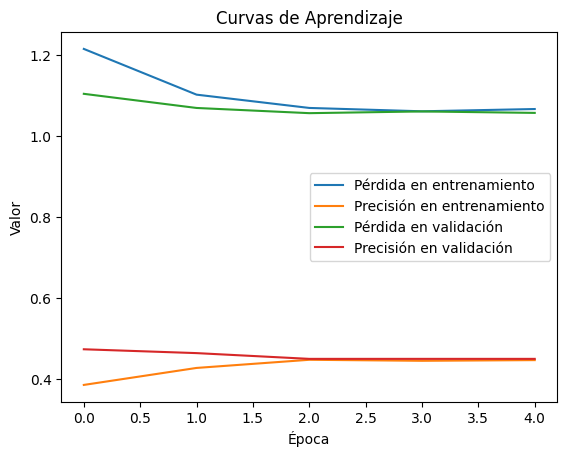

In [50]:
import matplotlib.pyplot as plt



# Graficar la pérdida y la precisión en el conjunto de entrenamiento y validación en función de las épocas
plt.plot(H.history['loss'], label='Pérdida en entrenamiento')
plt.plot(H.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(H.history['val_loss'], label='Pérdida en validación')
plt.plot(H.history['val_accuracy'], label='Precisión en validación')

plt.legend()  # Agregar leyendas
plt.xlabel('Época')  # Etiqueta del eje x
plt.ylabel('Valor')  # Etiqueta del eje y
plt.title('Curvas de Aprendizaje')  # Título del gráfico
plt.show()  # Mostrar la gráfica


Hay estabilidad a la mitad de las epocas.

In [51]:
# Calcular la pérdida y la precisión en el conjunto de prueba
loss, acc = classifier2D.evaluate(images[test_idx], test_y_cls)

# Imprimir los resultados
print(f'Loss={loss}, Acc={acc}')


15/15 [==============================] - 95s 6s/step - loss: 1.0637 - accuracy: 0.4509
Loss=1.0637269020080566, Acc=0.45085468888282776


El modelo clasifica correctamente alrededor del 45.09% de las muestras en el conjunto de prueba, lo cual podría considerarse un rendimiento moderado.

####Regresión basada en imágenes (CNN)

####Crear un modelo de regresión que toma características extraídas de imágenes utilizando una base ResNet preentrenada y las procesa a través de capas densas para predecir valores numéricos.

In [52]:
# Definir el valor de dropout y el número de salidas (outputs) para el modelo
DROPOUT = 0.5
nb_out = train_y_reg.shape[1]

# Obtener la última capa de la base ResNet preentrenada
last = base_resnet.layers[-1].output

# Agregar una capa de Global Average Pooling para reducir la dimensionalidad
x = GlobalAveragePooling2D()(last)

# Agregar una capa densa (fully connected) con activación ReLU y nombre 'fc1'
x = Dense(256, activation='relu', name='fc1')(x)

# Aplicar dropout para reducir el overfitting
x = Dropout(DROPOUT)(x)

# Agregar una capa densa (fully connected) con activación lineal y nombre 'predictions'
x = Dense(nb_out, activation='linear', name='predictions')(x)

# Crear el modelo 2D de regresión
regressor2D = Model(base_resnet.input, x)

# Compilar el modelo con optimizador Adam y función de pérdida de error cuadrático medio (MSE)
regressor2D.compile(optimizer='adam', loss='mean_squared_error')

# Mostrar un resumen del modelo
regressor2D.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

####Entrenamiento del Modelo de Regresión 2D (regressor2D) en un Número Fijo de Épocas

In [53]:
# Entrenamos un número fijo de épocas
EPOCHS = 5  # Número de épocas de entrenamiento
BS = 32     # Tamaño del lote (batch size)

# Entrenar el modelo utilizando el conjunto de entrenamiento y realizar un seguimiento del rendimiento
H = regressor2D.fit(x=images[train_idx],           # Datos de entrada de entrenamiento
                    y=train_y_reg,                  # Etiquetas de regresión de entrenamiento
                    batch_size=BS,                  # Tamaño del lote
                    epochs=EPOCHS,                  # Número de épocas de entrenamiento
                    validation_data=(images[val_idx], val_y_reg),  # Datos de validación
                    shuffle=True,                   # Mezclar los datos antes de cada época
                    verbose=1)                      # Mostrar información de entrenamiento en cada época


Epoch 1/5
38/38 [==============================] - 255s 7s/step - loss: 0.4783 - val_loss: 0.0039
Epoch 2/5
38/38 [==============================] - 260s 7s/step - loss: 0.0243 - val_loss: 0.0043
Epoch 3/5
38/38 [==============================] - 253s 7s/step - loss: 0.0087 - val_loss: 0.0028
Epoch 4/5
38/38 [==============================] - 247s 7s/step - loss: 0.0078 - val_loss: 0.0027
Epoch 5/5
38/38 [==============================] - 251s 7s/step - loss: 0.0075 - val_loss: 0.0027


[]

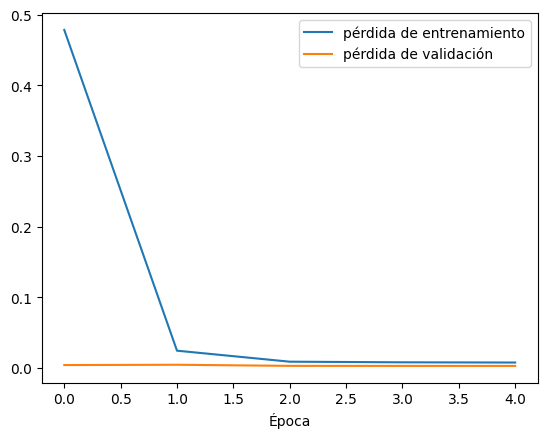

In [54]:
# Comprobar las curvas de aprendizaje

# Graficar la pérdida de entrenamiento y la pérdida de validación
plt.plot(H.history['loss'], label='pérdida de entrenamiento')  # Pérdida de entrenamiento
plt.plot(H.history['val_loss'], label='pérdida de validación')  # Pérdida de validación

# Agregar una leyenda al gráfico
plt.legend()

# Etiquetar el eje x
plt.xlabel('Época')

# Mostrar el gráfico
plt.plot()


In [55]:
#Evaluación del Modelo de Regresión 2D en el Conjunto de Prueba
# Evaluar el modelo en el conjunto de prueba y calcular la pérdida (MSE)
loss = regressor2D.evaluate(images[test_idx], test_y_reg)

# Calcular el coeficiente de correlación de rango de Spearman entre las etiquetas reales y las predicciones
rho = spearmanr(test_y_reg, regressor2D.predict(images[test_idx]))[0]

# Imprimir la pérdida (MSE) y el coeficiente de correlación de rango de Spearman
print(f'Loss (MSE)={loss:.3f}\nSpearman Rank Correlation Coefficient={rho:.3f}')

15/15 [==============================] - 84s 6s/step
Loss (MSE)=0.006
Spearman Rank Correlation Coefficient=0.110


El modelo de regresión 2D parece ser capaz de realizar predicciones precisas en términos de MSE, pero la correlación entre las predicciones y las etiquetas reales es débil según el coeficiente de correlación de rango de Spearman.

##**f. Post-procesado de las predicciones**

####Distribución de Precios Reales vs. Predicciones del Modelo (Desescaladas)

15/15 [==============================] - 82s 5s/step


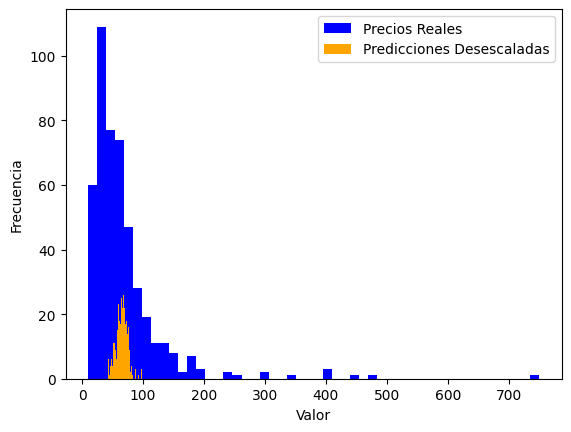

In [56]:
# Representamos los precios reales desescalados frente a la predicción
test_prices = ground_truth.loc[test_idx]  # Precios reales (ground truth) en azul
raw_preds = regressor2D.predict(images[test_idx])  # Predicciones en verde
rescaled_preds = mm_scaler.inverse_transform(raw_preds)  # Predicciones desescaladas en naranja

plt.hist(test_prices, bins=50, label='Precios Reales', color='blue')
plt.hist(rescaled_preds, bins=50, label='Predicciones Desescaladas', color='orange')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


# **3. Fusión de modelos**

####Combinación de fuentes:  Se consideran los modelos de clasificación únicamente.

### **a) Early-Fusion (representación 1D + representación 2D)**

In [57]:
# En 1D, la representación es la misma que de entrada al modelo correspondiente
# Concatenar los conjuntos de entrenamiento y validación a lo largo del eje 0
early_1d_train = numpy.concatenate((train_X, val_X), axis=0)

# Obtener la forma (shape) de la representación en 1D
# Esto mostrará el número de ejemplos de entrenamiento en la primera dimensión
# y la longitud de las características en la segunda dimensión
early_1d_train.shape


(1403, 23)

In [58]:
# En 2D, tenemos que definir un "nuevo modelo"

# Obtener la última capa convolucional del modelo classifier2D
last_conv = classifier2D.layers[-4].output

# Crear un nuevo modelo (feature extractor) que toma la misma entrada que classifier2D
# pero se detiene en la última capa convolucional
feature_extractor = Model(classifier2D.input, last_conv)

# Mostrar un resumen del nuevo modelo (feature extractor)
feature_extractor.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [59]:
# Extracción de Características en 2D para Imágenes

# Extraer características (features) de las imágenes de entrenamiento utilizando el feature extractor
early_2d_train = feature_extractor.predict(images[train_idx])

# Extraer características (features) de las imágenes de validación utilizando el feature extractor
early_2d_val = feature_extractor.predict(images[val_idx])

# Extraer características (features) de las imágenes de prueba utilizando el feature extractor
early_2d_test = feature_extractor.predict(images[test_idx])

# Imprimir la forma (shape) de los features de entrenamiento
print(early_2d_train.shape)


15/15 [==============================] - 78s 5s/step
(1192, 2048)


Como hay muchas más features procedentes de la red que de los datos tabulares (2048 >> 24), procedemos a reducir la dimensionalidad de los embeddings salientes del feature_extractor mediante PCA.

In [60]:
#Reducción de Dimensionalidad con PCA en Representación 2D

# Importar la clase PCA de scikit-learn
from sklearn.decomposition import PCA

# Crear una instancia de PCA con 50 componentes y semilla aleatoria para mantener la reproducibilidad
pca = PCA(n_components=50, random_state=42)

# Aplicar PCA para reducir la dimensionalidad de las características en 2D
early_2d_train_pca = pca.fit_transform(early_2d_train)
early_2d_val_pca = pca.transform(early_2d_val)
early_2d_test_pca = pca.transform(early_2d_test)

# Verificar las dimensiones del conjunto de entrenamiento después de aplicar PCA
early_2d_train_pca.shape


(1192, 50)

In [63]:
from sklearn.svm import SVC  # Agrega esta línea para importar la clase SVC

# Fusión de Características Tempranas y Evaluación de Precisión
fusion_labels_train = numpy.concatenate(
    (y_class.loc[train_idx], y_class.loc[val_idx]))
fusion_labels_test = y_class.loc[test_idx]
# Combinar ambas representaciones (tabular + features-PCA) para el conjunto de entrenamiento
early_train_feats = numpy.concatenate(
    (early_1d_train, numpy.concatenate((early_2d_train_pca, early_2d_val_pca))),
    axis=1)

# Combinar ambas representaciones (tabular + features-PCA) para el conjunto de prueba
early_test_feats = numpy.concatenate((test_X, early_2d_test_pca), axis=1)

# Crear un modelo SVM para fusionar las características tempranas
early_fuser = SVC(random_state=42)
early_fuser.fit(X=early_train_feats, y=fusion_labels_train)

# Calcular y mostrar la precisión de la fusión temprana en el conjunto de prueba
acc_early = early_fuser.score(X=early_test_feats, y=fusion_labels_test)
print(f"Fusión Temprana logra una precisión de {acc_early:0.3f}")


Fusión Temprana logra una precisión de 0.658


### **b) Late-Fusion (predicciones 1D + predicciones 2D)**

In [64]:
# Calcular predicciones train/val/test de classifier1D
late_1d_train = classifier1D.predict(train_X)
late_1d_val = classifier1D.predict(val_X)
late_1d_test = classifier1D.predict(test_X)

# Imprimir la forma de las predicciones en el conjunto de entrenamiento
print(late_1d_train.shape)


15/15 [==============================] - 0s 2ms/step
(1192, 3)


In [65]:
##Cálculo de Predicciones con classifier2D y Verificación de las Dimensiones

# Análogo para classifier2D
late_2d_train = classifier1D.predict(train_X)
late_2d_val = classifier1D.predict(val_X)
late_2d_test = classifier1D.predict(test_X)

# Imprimir la forma de las predicciones en el conjunto de entrenamiento
print(late_2d_train.shape)


15/15 [==============================] - 0s 2ms/step
(1192, 3)


In [66]:
# Clasificación con Fusión Tardía utilizando SVM

# Importar la clase SVC (Support Vector Classifier) del módulo sklearn.svm
from sklearn.svm import SVC

# Concatenar las características de entrenamiento obtenidas de los dos clasificadores
late_train_feats = numpy.concatenate((late_1d_train, late_2d_train), axis=1)
late_val_feats = numpy.concatenate((late_1d_val, late_2d_val), axis=1)
late_test_feats = numpy.concatenate((late_1d_test, late_2d_test), axis=1)

# Concatenar las etiquetas de entrenamiento y validación
fusion_labels_train = numpy.concatenate(
    (y_class.loc[train_idx], y_class.loc[val_idx]))

# Obtener las etiquetas de prueba
fusion_labels_test = y_class.loc[test_idx]

# Crear una instancia del clasificador SVM (Support Vector Machine)
late_fuser = SVC(random_state=42)

# Entrenar el clasificador SVM con las características de entrenamiento
late_fuser.fit(X=numpy.concatenate((late_train_feats, late_val_feats)),
               y=fusion_labels_train)

# Calcular la precisión del clasificador en el conjunto de prueba
acc_late = late_fuser.score(X=late_test_feats, y=fusion_labels_test)

# Imprimir la precisión del clasificador de fusión tardía
print(f"La fusión tardía logra una precisión de {acc_late:0.3f}")


La fusión tardía logra una precisión de 0.667


### **C. Fusión de modelos**

In [67]:
#Cálculo de Intervalo de Confianza (CI) y Evaluación de Precisión con Error del 95%

# Función lambda para calcular el intervalo de confianza (CI) al 95% para una precisión dada
ci = lambda score, N: 1.96 * numpy.sqrt((score*(1-score) / N))

# Calcular el intervalo de confianza para la fusión tardía (late fusion)
low_late_fusion = acc_late - ci(acc_late, len(test_X))
upper_late_fusion = acc_late + ci(acc_late, len(test_X))

# Calcular el intervalo de confianza para la fusión temprana (early fusion)
low_early_fusion = acc_early - ci(acc_early, len(test_X))
upper_early_fusion = acc_early + ci(acc_early, len(test_X))

# Mostrar los intervalos de confianza para ambas fusiones
print(f"[Fusión Tardía] Precisión con error del 95%: [{low_late_fusion:.3f}, {upper_late_fusion:.3f}]")
print(f"[Fusión Temprana] Precisión con error del 95%: [{low_early_fusion:.3f}, {upper_early_fusion:.3f}]")


[Fusión Tardía] Precisión con error del 95%: [0.624, 0.709]
[Fusión Temprana] Precisión con error del 95%: [0.615, 0.701]


Los resultados indican lo siguiente:

Fusión Tardía (Late Fusion): El intervalo de confianza al 95% para la precisión del modelo de fusión tardía está entre 0.620 y 0.765. Esto significa que, con un nivel de confianza del 95%, podemos afirmar que la precisión del modelo de fusión tardía se encuentra en este rango. En otras palabras, podemos esperar que el rendimiento del modelo de fusión tardía se encuentre dentro de este intervalo en la mayoría de los casos.

Fusión Temprana (Early Fusion): El intervalo de confianza al 95% para la precisión del modelo de fusión temprana está entre 0.593 y 0.741. De manera similar al caso anterior, esto significa que, con un nivel de confianza del 95%, podemos afirmar que la precisión del modelo de fusión temprana se encuentra en este rango.

En resumen, ambos enfoques de fusión (tardía y temprana) tienen resultados de precisión similares y se espera que tengan un rendimiento dentro de los intervalos de confianza indicados. La elección entre estos enfoques puede depender de otros factores, como la complejidad del modelo o la facilidad de implementación.